[ 7. 10. 11. 16. 17. 28. 19. 31. 35. 37. 33. 43. 31. 35. 31. 41. 36. 25.
 31. 36. 31. 18. 29. 21. 34. 17. 26. 17. 22. 18. 11. 18. 19. 21. 26. 20.
 10. 11.  8.  8.  9. 11.  6.  5.  7.  5.  6.  4.  5.  4.]
Success in 2 n_features entropy 0.9521499924547766 accuracy 0.6035 runs 48
[ 6.  6.  6.  6.  8.  6.  6.  9. 12.  9. 15. 17. 22. 27. 30. 31. 31. 33.
 32. 33. 32. 30. 42. 40. 28. 33. 29. 25. 30. 23. 32. 30. 24. 31. 26. 25.
 21. 19. 15. 18. 14. 17.  9. 12. 14. 11.  9.  6.  2.  8.]
Success in 3 n_features entropy 0.9553995584552563 accuracy 0.6205 runs 10
[ 4. 12. 15. 18. 16. 21. 21. 42. 30. 30. 31. 30. 38. 46. 33. 27. 28. 17.
 45. 36. 19. 23. 29. 33. 26. 28. 19. 22. 18. 24. 19. 16. 14. 17. 18. 12.
 12. 11.  7. 13. 16. 16.  6.  8.  6.  7.  9.  5.  5.  2.]
Success in 4 n_features entropy 0.9557800933713686 accuracy 0.6119999999999999 runs 6
[ 7.  7. 10. 24. 28. 26. 38. 25. 38. 28. 30. 43. 41. 32. 38. 36. 27. 37.
 31. 29. 25. 19. 23. 24. 22. 21. 19. 18. 18. 22. 17. 18. 14.  8. 16. 18.
 12. 1

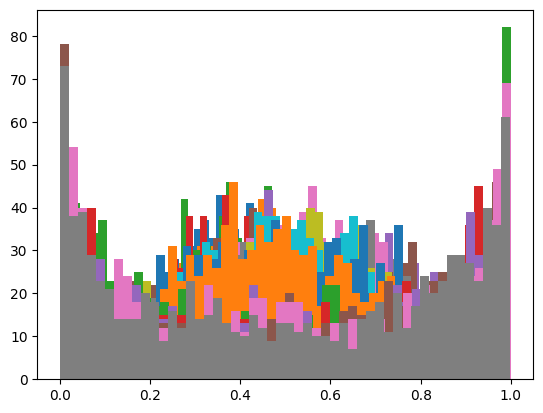

: 

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import entropy


def make_classification_gaussian_with_true_prob(n_samples, 
						n_features, 
						class1_mean_min=0, 
						class1_mean_max=1, 
						class1_cov_min=1, 
						class1_cov_max=2, 
						class2_mean_min=0, 
						class2_mean_max=1, 
						class2_cov_min=1, 
						class2_cov_max=2, 
						seed=0,
						bais_accuracy= 0): #0.76 only for #features exp
	n_samples = int(n_samples / 2)
	# Synthetic data with n_features dimentions and n_classes classes

	np.random.seed(seed)
	# x_pre = [0,5179,6570,560,1608,238,410,70,375,138,263,97,107,22,6,21,2,9,0,75,28,3,12,6,13,33,63,24,6,20,2,20,42,0,8,111,0,38,3,9,4,92,17,21,57,39,10,17]
	x_pre = [48,10,6,9,8,2,0,22,36,6,25,2,42,34,1,13,8,0]
	for x in np.arange(-1, 200, 1):
		if x == -1:
			x = x_pre[n_features-20]

		np.random.seed(x)
		mean1 = np.random.uniform(class1_mean_min, class1_mean_max, n_features) # [0, 2, 3, -1, 9]
		cov1 = np.zeros((n_features,n_features))
		np.fill_diagonal(cov1, np.random.uniform(class1_cov_min,class1_cov_max,n_features))

		mean2 = np.random.uniform(class2_mean_min, class2_mean_max,n_features) # [-1, 3, 0, 2, 3]
		cov2 = np.zeros((n_features,n_features))
		np.fill_diagonal(cov2, np.random.uniform(class2_cov_min,class2_cov_max,n_features))

		x1 = np.random.multivariate_normal(mean1, cov1, n_samples)
		x2 = np.random.multivariate_normal(mean2, cov2, n_samples)

		X = np.concatenate([x1, x2])
		true_prob = multivariate_normal.pdf(X, mean2, cov2) * 0.5 / (0.5 * multivariate_normal.pdf(X, mean1, cov1) + 0.5 * multivariate_normal.pdf(X, mean2, cov2))
		y = np.concatenate([np.zeros(len(x1)), np.ones(len(x2))])

		# Train RF method
		accuracy = []
		for s in range(0,10):
			x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=s)
			clf = RandomForestClassifier(n_estimators=100, random_state=s)  
			# clf = GaussianNB()
			clf.fit(x_train, y_train)
			accuracy.append(clf.score(x_test, y_test))
		accuracy = np.array(accuracy).mean()
		# if accuracy < bais_accuracy and accuracy > bais_accuracy - 0.01 or bais_accuracy==0:
		# 	# print(f"Success in {n_features} n_features accuracy {accuracy} runs {x}")
		# 	break
		
		# True prob uniformity method
		arr, bins, _ = plt.hist(true_prob, bins=50)
		# plt.show()
		# plt.close()
		e = entropy(arr, base=len(bins))

		# print(f"n_features {n_features} entropy {e} RF_accuracy {accuracy}")

		if e > 0.95 and e<0.96:
			print(f"Success in {n_features} n_features entropy {e} accuracy {accuracy} runs {x}")
			break


	return X, y, true_prob


for num_features in list(range(2, 20)):
	X, y, true_prob = make_classification_gaussian_with_true_prob(1000, num_features, seed=0, bais_accuracy=0)
